In [12]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer, Vars
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs import moving_average, update_plotstyle
import lowEBMs.Packages.Constants as const
update_plotstyle()

ModuleNotFoundError: No module named 'lowEBMs.Packages.Constants'

In [9]:
#Load basic configuration
configSolar=importer('../Config/EBM1D_SolarForcing.ini')
variable_importer(configSolar,initialZMT=True)
configSolar,Paras=add_sellersparameters(configSolar,parameterinterpolatorstepwise,'SellersParameterization.ini',3,1,True,True)

#update for Spinup and run
variable_importer(configSolar,initialZMT=True,control=True)
Spinup_Solar=rk4alg(model_equation,configSolar['eqparam'],configSolar['rk4input'],configSolar['funccomp'])

#update for Targetsimulation with Spinup as initial and run
variable_importer(configSolar,initialZMT=False,control=False)
Vars.T,Vars.T_global=Spinup_Solar[1][-1],Spinup_Solar[2][-1]
Data_Solar=rk4alg(model_equation,configSolar['eqparam'],configSolar['rk4input'],configSolar['funccomp'])

Loading Configuration from: ../Config/EBM1D_SolarForcing.ini
Loading Parameters from: ../Config/Data/SellersParameterization.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Steady State reached after 28605 steps, within 65.76033663749695 seconds
Finished controlrun over 928.3698630136986 years. Runtime: 65.80908226966858 s


HBox(children=(IntProgress(value=0, max=36500), HTML(value='')))

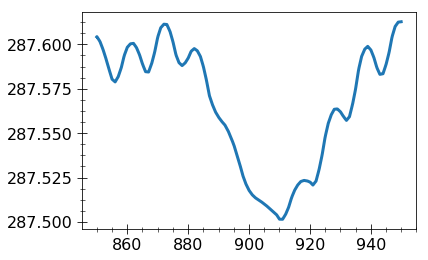

In [11]:
#plt.plot((Spinup_Solar[0][0]-(Spinup_Solar[0][-1]-Spinup_Solar[0][0])+(Spinup_Solar[0]-Spinup_Solar[0][0]))/constants.time_sec_year,Spinup_Solar[2])
plt.plot(Data_Solar[0]/const.time_sec_year,Data_Solar[2])